In [50]:
import scanpy as sc
import sys
import pandas as pd
import numpy as np
sys.path.insert(0, '../scvi-tools')
from scvi.hub import HubModel
import scvi
import matplotlib.pyplot as plt

sc.set_figure_params(vector_friendly=True, dpi_save=300, fontsize=14)
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.unicode_minus'] = True

In [51]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

In [52]:
import milopy
import milopy.core as milo

In [53]:
adata = sc.read_h5ad('../cart_integrated_annotated.h5ad')

In [54]:
adata

AnnData object with n_obs × n_vars = 417167 × 4033
    obs: 'S_score', 'G2M_score', 'cell_cycle_phase', 'sample_id', 'knnCD3', 'knnCD8', 'knnCD4', 'knnIAC', 'cell_compartment', 'CAR_expression', 'CAR_status', 'CRS max grade', '3mo PET/CT', 'ICANS group', 'prolonged cytopenia', 'response3m', 'organism_ontology_term_id', 'donor_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'batch', '_scvi_batch', '_scvi_labels', 'celltypist_cell_type_pred', 'celltypist_cell_type_uncertainty', 'celltypist_cell_type_pred_wo_lymphocyte', 'celltypist_cell_type_uncertainty_wo_lymphocyte', 'celltypist_cell_type_pred_sub', '_scvi_raw_norm_scaling', 'louvain

In [55]:
adata.obs['sex'].value_counts()

male      280252
female    136915
Name: sex, dtype: int64

In [56]:
adata.obs['self_reported_ethnicity'].value_counts()

European            304461
African American     38466
unknown              37429
Asian                36811
Name: self_reported_ethnicity, dtype: int64

In [57]:
adata.obs['development_stage'].value_counts()

seventh decade human stage    135071
sixth decade human stage       96878
eighth decade human stage      61280
fifth decade human stage       60805
third decade human stage       24244
fourth decade human stage      20336
ninth decade human stage       18553
Name: development_stage, dtype: int64

In [58]:
adata.obs['senior_age'] = ['Yes' if i in ['seventh decade human stage', 'eighth decade human stage', 'ninth decade human stage'] else 'No' for i in adata.obs['development_stage']]

In [59]:
adata.obs['development_stage'].value_counts()

seventh decade human stage    135071
sixth decade human stage       96878
eighth decade human stage      61280
fifth decade human stage       60805
third decade human stage       24244
fourth decade human stage      20336
ninth decade human stage       18553
Name: development_stage, dtype: int64

In [60]:
adata.obs['CRS_max_grade'] = adata.obs['CRS max grade'].astype(str)
adata.obs['ICANS_group'] = adata.obs['ICANS group'].astype(str)

In [61]:
adata

AnnData object with n_obs × n_vars = 417167 × 4033
    obs: 'S_score', 'G2M_score', 'cell_cycle_phase', 'sample_id', 'knnCD3', 'knnCD8', 'knnCD4', 'knnIAC', 'cell_compartment', 'CAR_expression', 'CAR_status', 'CRS max grade', '3mo PET/CT', 'ICANS group', 'prolonged cytopenia', 'response3m', 'organism_ontology_term_id', 'donor_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'batch', '_scvi_batch', '_scvi_labels', 'celltypist_cell_type_pred', 'celltypist_cell_type_uncertainty', 'celltypist_cell_type_pred_wo_lymphocyte', 'celltypist_cell_type_uncertainty_wo_lymphocyte', 'celltypist_cell_type_pred_sub', '_scvi_raw_norm_scaling', 'louvain

AnnData object with n_obs × n_vars = 34322 × 4033
    obs: 'S_score', 'G2M_score', 'cell_cycle_phase', 'sample_id', 'knnCD3', 'knnCD8', 'knnCD4', 'knnIAC', 'cell_compartment', 'CAR_expression', 'CAR_status', 'CRS max grade', '3mo PET/CT', 'ICANS group', 'prolonged cytopenia', 'response3m', 'organism_ontology_term_id', 'donor_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'batch', '_scvi_batch', '_scvi_labels', 'celltypist_cell_type_pred', 'celltypist_cell_type_uncertainty', 'celltypist_cell_type_pred_wo_lymphocyte', 'celltypist_cell_type_uncertainty_wo_lymphocyte', 'celltypist_cell_type_pred_sub', '_scvi_raw_norm_scaling', 'louvain'

/tmp/ipykernel_902257/561794206.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  subset.obs['donor_id'].cat.remove_unused_categories(inplace=True)


/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


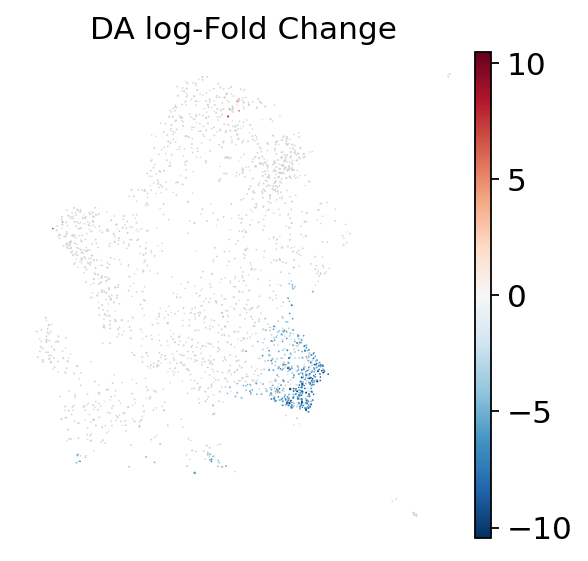

In [62]:
subset = adata[adata.obs['CRS_max_grade'].isin(['0.0', '3.0', '4.0'])].copy()
print(subset)
subset.obs['donor_id'].cat.remove_unused_categories(inplace=True)
sc.pp.neighbors(subset, n_neighbors=100, use_rep='_scvi_latent_qzm', method='rapids')
milo.make_nhoods(subset)
## Count cells from each sample in each nhood
milo.count_nhoods(subset, sample_col="donor_id")
## Test for differential abundance between conditions
milo.DA_nhoods(subset, design="~ ICANS_group") # + development_stage")

## Check results
milo_results = subset.uns["nhood_adata"].obs
milopy.utils.build_nhood_graph(subset)
milopy.plot.plot_nhood_graph(subset, alpha=0.1, min_size=0.01)

/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


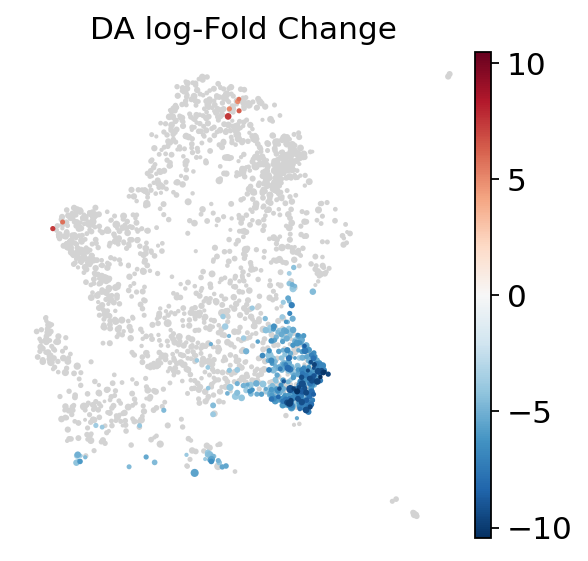

In [63]:
milopy.plot.plot_nhood_graph(subset, alpha=0.1, min_size=0.1, save="ICANS_group.svg")

In [64]:
adata.obs['prolonged_cytopenia'] = adata.obs['prolonged cytopenia']

/tmp/ipykernel_902257/2956650560.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  subset.obs['donor_id'].cat.remove_unused_categories(inplace=True)
/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


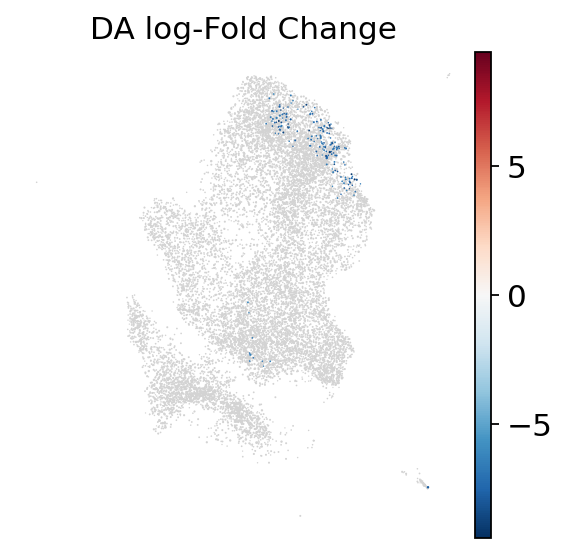

In [65]:
subset = adata[adata.obs['prolonged_cytopenia'].isin(['Yes', 'No'])].copy()
subset.obs['donor_id'].cat.remove_unused_categories(inplace=True)
sc.pp.neighbors(subset, n_neighbors=100, use_rep='_scvi_latent_qzm', method='rapids')
milo.make_nhoods(subset)
## Count cells from each sample in each nhood
milo.count_nhoods(subset, sample_col="donor_id")
## Test for differential abundance between conditions
milo.DA_nhoods(subset, design="~ prolonged_cytopenia + development_stage")

## Check results
milo_results = subset.uns["nhood_adata"].obs
milopy.utils.build_nhood_graph(subset)
milopy.plot.plot_nhood_graph(subset, alpha=0.1, min_size=0.01)

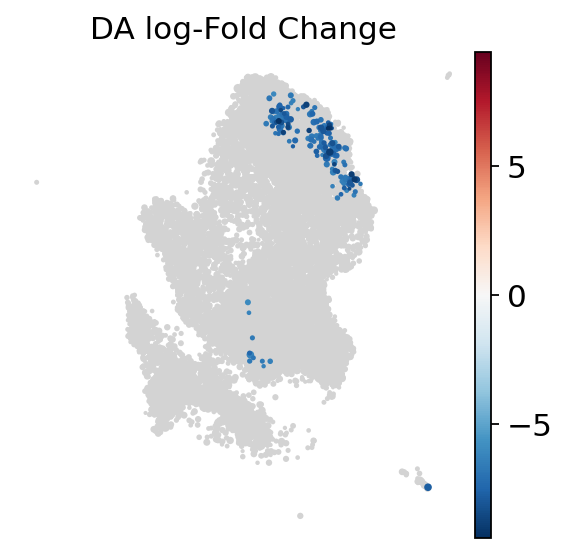

In [66]:
milopy.plot.plot_nhood_graph(subset, alpha=0.1, min_size=0.1, save="_prolonged_neutropenia.svg")

/tmp/ipykernel_902257/2987216695.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  subset.obs['donor_id'].cat.remove_unused_categories(inplace=True)
/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


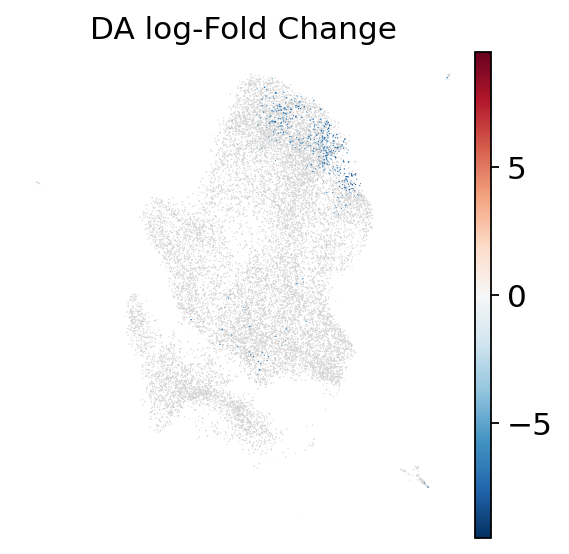

In [67]:
subset = adata[adata.obs['response3m'].isin(['NR', 'R'])].copy()
subset.obs['donor_id'].cat.remove_unused_categories(inplace=True)
sc.pp.neighbors(subset, n_neighbors=50, use_rep='_scvi_latent_qzm', method='rapids')
milo.make_nhoods(subset)
## Count cells from each sample in each nhood
milo.count_nhoods(subset, sample_col="donor_id")
## Test for differential abundance between conditions
milo.DA_nhoods(subset, design="~ response3m + development_stage")

## Check results
milo_results = subset.uns["nhood_adata"].obs
milopy.utils.build_nhood_graph(subset)
milopy.plot.plot_nhood_graph(subset, alpha=0.1, min_size=0.01)

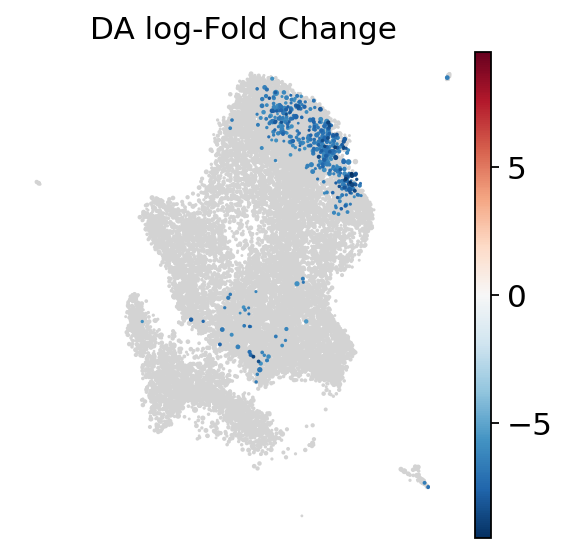

In [68]:
milopy.plot.plot_nhood_graph(subset, alpha=0.1, min_size=0.1, save="_prolonged_response.svg")

/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data f

/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


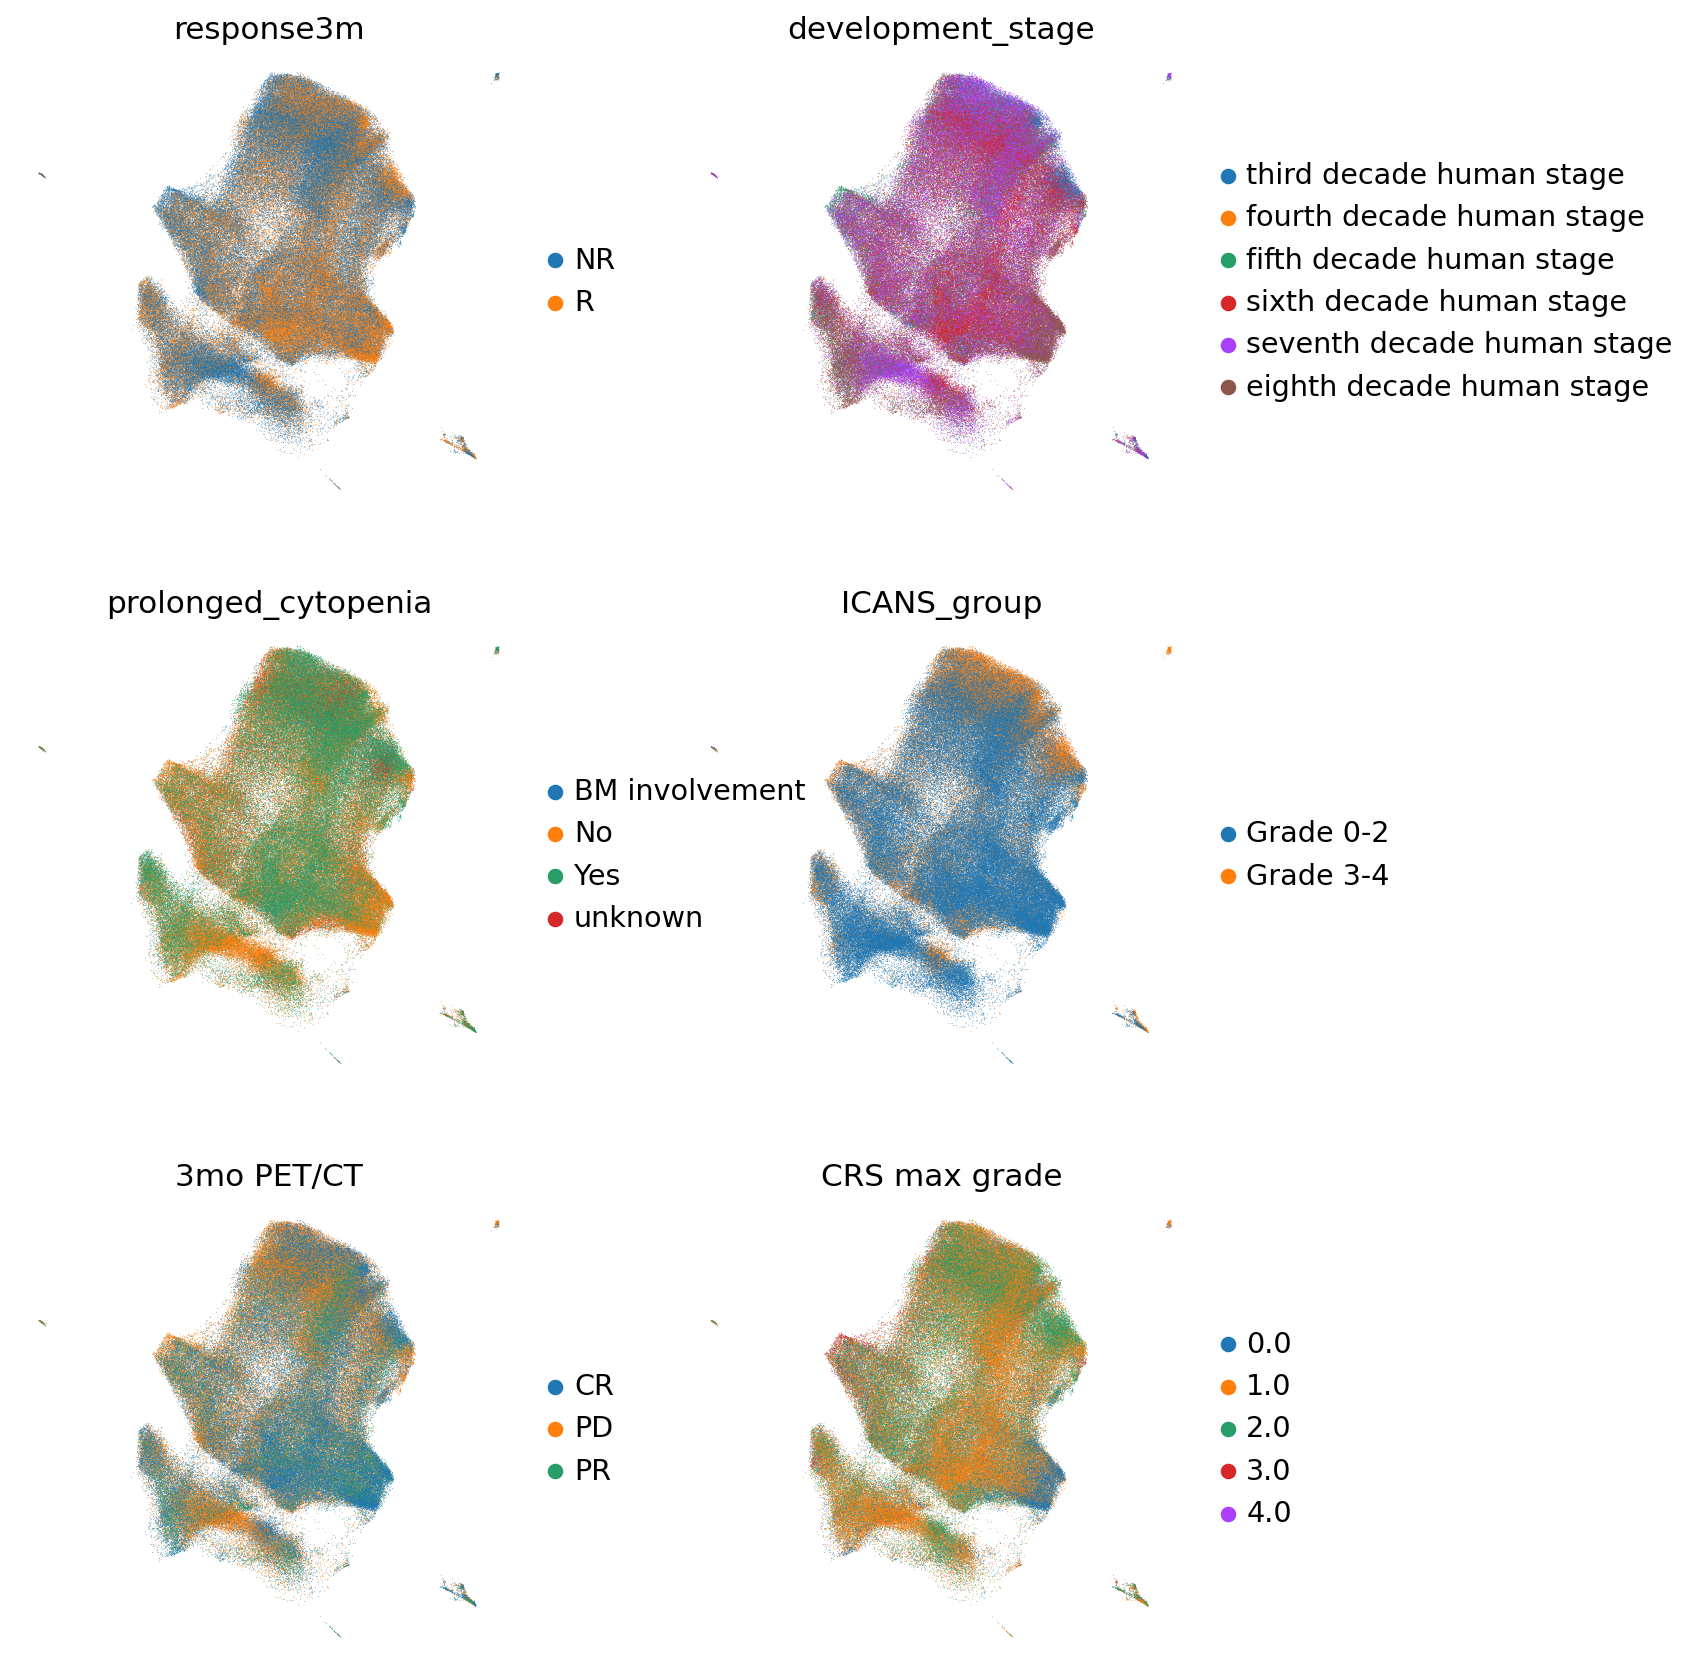

In [69]:
sc.pl.umap(subset, color=['response3m', 'development_stage', 'prolonged_cytopenia', 'ICANS_group', '3mo PET/CT', 'CRS max grade'], ncols=2, frameon=False, save='meta_cart.svg')

/home/cane/miniconda3/envs/hub_paper/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


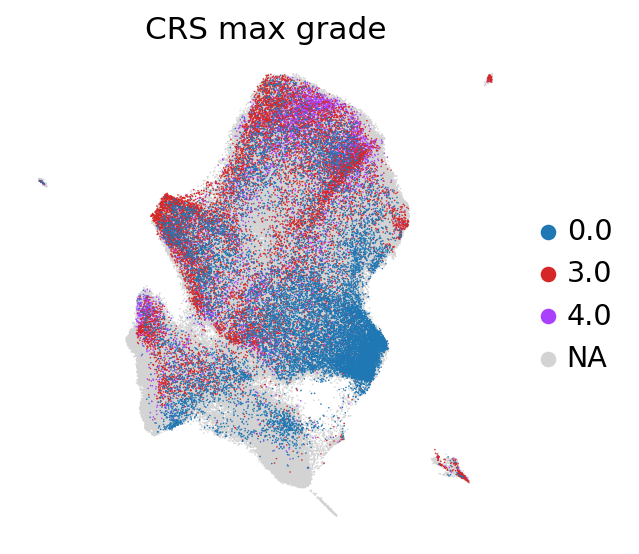

: 

In [70]:
sc.pl.umap(adata, color='CRS max grade', groups=['4.0', '3.0', '0.0'], ncols=2, size=2, frameon=False, save='crs_max_grade.svg')